In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
test_sizes = [1,5,10,25,50,75,100,125,140,145,149]

In [3]:
def tpr(sample,target_class=0):
    # Actual cases
    subset = np.where(sample[:,0]==target_class)[0]
    num_true = len(subset)
    num_false_negatives = len(np.where(sample[subset,1]!=target_class)[0])
    num_true_positives = num_true - num_false_negatives
    # Uncomment to print the counts...
    # print(num_true,num_true_positives,num_false_negatives)

    # Cases we are not interested in
    subset = np.where(sample[:,0]!=target_class)[0]
    num_false = len(subset)
    num_true_negatives = len(np.where(sample[subset,1]!=target_class)[0])
    num_false_positives = num_false - num_true_negatives
    # Uncomment to print the counts
    # print(num_false,num_false_positives,num_true_negatives)

    # Definition of the false positive rate (want this to be low)
    try:
        true_positive_ratio = float(num_true_positives) / (float(num_true_positives) + float(num_false_negatives))
    except:
        true_positive_ratio = 1.0
    return true_positive_ratio * 100.0

# Runs the FPR calculation on -each- random
# sample - the average of these sample FPRs
# is the False Positive Rate
def calc_tpr(data,target_class=0,N=100):
    sample_size = int(data.shape[0] / N)
    nsamples = int(data.shape[0]/sample_size)
    return [tpr(data[s*sample_size:(s*sample_size)+sample_size,:],target_class) for s in range(0,nsamples)]

In [4]:
# Single data set example - N=100 (2500 lines in the file)
np.mean(calc_tpr(np.loadtxt("iris-results-25.txt"),2))

90.01673049173048

In [6]:
tprs = np.array([calc_tpr(np.loadtxt("iris-results-%d.txt"%x),2) for x in test_sizes]).transpose()

In [7]:
means = np.mean(tprs,0)
means

array([97.        , 91.31666667, 90.01673049, 89.94800795, 90.07967262,
       87.98144046, 75.71027106, 60.15585335, 35.        ])

In [8]:
stderr = np.std(tprs,0) / np.sqrt(100)
stderr

array([1.70587221, 1.45416929, 1.13175879, 0.67500414, 0.71962643,
       1.0114917 , 2.44156159, 3.63166917, 4.76969601])

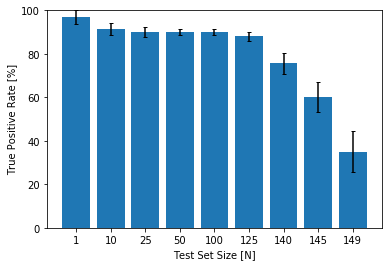

In [11]:
plt.bar([str(x) for x in test_sizes],means,yerr=1.96*stderr,capsize=2)
plt.ylim(0,100)
plt.xlabel("Test Set Size [N]")
plt.ylabel("True Positive Rate [%]")
plt.show()